In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [60]:
archivos = {
    2004: "respondieron_2004.xlsx",
    2024: "respondieron_2024.xlsx"
}


In [61]:
splits = {}

for anio, ruta in archivos.items():
    df = pd.read_excel(ruta)
    
    estado_col = next((col for col in df.columns if col.lower() == 'estado'), None)
    if not estado_col:
        raise ValueError(f"No se encontró una columna 'estado' en el archivo del año {anio}.")

    df['desocupado'] = (df[estado_col] == 2).astype(int)

In [62]:
y = df['desocupado']
X = df.drop(columns=['desocupado', estado_col])
X.insert(0, 'constante', 1)

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=444)

In [63]:
y = df['desocupado']
X = df.drop(columns=['desocupado', estado_col])

X.insert(0, 'constante', 1)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=444)

In [64]:
splits[anio] = {
'X_train': X_train,
'X_test': X_test,
'y_train': y_train,
'y_test': y_test
    }

In [65]:
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num = X_test.select_dtypes(include=[np.number])
    # Crear tabla de diferencia de medias
diff_means = X_train_num.mean() - X_test_num.mean()
tabla_diff = pd.DataFrame({
'Media Entrenamiento': X_train_num.mean(),
'Media Test': X_test_num.mean(),
'Diferencia': diff_means
})
print(f"\nDiferencia de medias para el año {anio}:")
print(tabla_diff.round(3))


Diferencia de medias para el año 2024:
           Media Entrenamiento  Media Test  Diferencia
constante                1.000       1.000       0.000
level_0              24849.086   25020.324    -171.238
index                24849.086   25020.324    -171.238
ANO4                  2024.000    2024.000       0.000
TRIMESTRE                1.000       1.000       0.000
...                        ...         ...         ...
RDECCFR                  7.895       7.973      -0.077
GDECCFR                  7.940       8.019      -0.079
PDECCFR                    NaN         NaN         NaN
ADECCFR                  7.902       7.968      -0.066
PONDIH                2298.078    2223.961      74.118

[175 rows x 3 columns]


In [66]:
splits = {}

for anio, ruta in archivos.items():
    df = pd.read_excel("respondieron_2004.xlsx")

    estado_col = next((col for col in df.columns if col.lower() == 'estado'), None)
    if not estado_col:
        raise ValueError(f"No se encontró una columna 'estado' en el archivo del año {anio}.")

    df['desocupado'] = (df[estado_col] == 2).astype(int)

In [67]:
y = df['desocupado']
X = df.drop(columns=['desocupado', estado_col])
X.insert(0, 'constante', 1)

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=444)

In [68]:
splits[anio] = {'X_train': X_train,'X_test': X_test,'y_train': y_train,'y_test': y_test}

In [69]:
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num = X_test.select_dtypes(include=[np.number])

diff_means = X_train_num.mean() - X_test_num.mean()
tabla_diff = pd.DataFrame({
'Media Entrenamiento': X_train_num.mean(),
'Media Test': X_test_num.mean(),
'Diferencia': diff_means
})
print(f"\nDiferencia de medias para el año {2004}:")
print(tabla_diff.round(3))


Diferencia de medias para el año 2004:
           Media Entrenamiento  Media Test  Diferencia
constante                1.000       1.000       0.000
level_0               3815.441    3844.661     -29.220
index                 3815.441    3844.661     -29.220
CODUSU              206648.095  206572.037      76.058
nro_hogar                1.025       1.028      -0.003
...                        ...         ...         ...
deccfr                   4.991       4.939       0.052
rdeccfr                  4.691       4.648       0.043
gdeccfr                  4.800       4.757       0.043
adeccfr                  4.766       4.756       0.010
idimpp                1520.391    1721.296    -200.905

[65 rows x 3 columns]


In [70]:
archivos = {
    2004: "respondieron_2004.xlsx",
    2024: "respondieron_2024.xlsx"
}

for anio, ruta in archivos.items():
    try:
        df = pd.read_excel(ruta)

        estado_col = next((col for col in df.columns if col.lower() == 'estado'), None)
        if not estado_col:
            print(f"No se encontró 'estado' en el año {anio}.")
            continue

        df['desocupado'] = (df[estado_col] == 2).astype(int)

        if 'salario_semanal' not in df.columns:
            if anio == 2004 and 'p21' in df.columns:
                df['salario_semanal'] = df['p21'] * 631.5 / 40
            elif anio == 2024 and 'P21' in df.columns:
                df['salario_semanal'] = df['P21'] / 40
            else:
                print(f"No se pudo crear 'salario_semanal' en {anio}.")
                continue

        ocupados = df[df[estado_col] == 1].copy()
        columnas = {col.lower(): col for col in ocupados.columns}

        if 'ch09' in columnas:
            ocupados['edad'] = ocupados[columnas['ch09']]
            ocupados['edad2'] = ocupados['edad'] ** 2
        if 'nivel_ed' in columnas:
            ocupados['educ'] = ocupados[columnas['nivel_ed']]
            ocupados['NIVEL_ED'] = ocupados[columnas['nivel_ed']]
        if 'ch04' in columnas:
            ocupados['mujer'] = (ocupados[columnas['ch04']] == 2).astype(int)

        modelos = [
            ['edad'],
            ['edad', 'edad2'],
            ['edad', 'edad2', 'educ'],
            ['edad', 'edad2', 'educ', 'mujer'],
            ['edad', 'edad2', 'educ', 'mujer', 'NIVEL_ED', columnas.get('ch04', 'CH04')]
        ]

        for i, vars in enumerate(modelos, start=1):
            if all(v in ocupados.columns for v in vars):
                df_m = ocupados[['salario_semanal'] + vars].dropna()
                y = df_m['salario_semanal']
                X = sm.add_constant(df_m[vars])
                modelo = sm.OLS(y, X).fit()

                print(f"\nModelo {i}:")
                print("Coeficientes:\n", modelo.params.round(3))
                print("Errores estándar:\n", modelo.bse.round(3))
                print("P-valores:\n", modelo.pvalues.round(3))
                print("R-cuadrado:", round(modelo.rsquared, 4))
            else:
                print(f"\nModelo {i}: faltan columnas: {[v for v in vars if v not in ocupados.columns]}")

    except Exception as e:
        print(f"Error en el año {anio}: {e}")


Error en el año 2004: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Modelo 1:
Coeficientes:
 const    7706.526
edad    -1117.443
dtype: float64
Errores estándar:
 const    1250.963
edad     1231.816
dtype: float64
P-valores:
 const    0.000
edad     0.364
dtype: float64
R-cuadrado: 0.0003

Modelo 2:
Coeficientes:
 const    11255.387
edad     -5087.510
edad2      426.321
dtype: float64
Errores estándar:
 const    5072.172
edad     5635.171
edad2     590.489
dtype: float64
P-valores:
 const    0.027
edad     0.367
edad2    0.470
dtype: float64
R-cuadrado: 0.0004

Modelo 3:
Coeficientes:
 const    6726.059
edad    -7310.923
edad2     653.929
educ     1525.947
dtype: float64
Errores estándar:
 const    4985.539
edad     5525.228
edad2     578.953
educ      131.577
dtype: float64
P-valores:
 const    0.177
edad     0.186
edad2    0.259
educ     0.000
dtype: float64
R-cuadrado: 0.0405

Modelo 4:
Coeficientes:
 const    6673.537
edad    -6724.342
edad2   

In [71]:
respondieron_2004 = pd.read_excel("respondieron_2004.xlsx")
num_respondieron_2004 = respondieron_2004.copy()

num_respondieron_2004['ch09'] = num_respondieron_2004['ch09'].map({
    'Sí': 1,
    'No': 2,
    'Menor de 2 años': 3
})

num_respondieron_2004['nivel_ed'] = num_respondieron_2004['nivel_ed'].map({
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7,
    'Ns./ Nr': 9
})

num_respondieron_2004['ch04'] = num_respondieron_2004['ch04'].map({
    'Varón': 1,
    'Mujer': 2
})
num_respondieron_2004['desocupado'] = (num_respondieron_2004['estado'] == "Desocupado").astype(int)


X_2004 = num_respondieron_2004[['ch09', 'nivel_ed', 'ch04']]


X_2004['intercepto'] = 1


y_2004 = num_respondieron_2004['desocupado']

data = pd.concat([X_2004, y_2004], axis=1).dropna()
X_clean_2004 = data.drop(columns='desocupado')
y_clean_2004 = data['desocupado']


X_2004_train, X_2004_test, y_2004_train, y_2004_test = train_test_split(X_clean_2004, y_clean_2004, train_size=0.7, random_state=444)


print("X_2004_train shape:", X_2004_train.shape)
print("X_2004_test shape:", X_2004_test.shape)
print("y_2004_train shape:", y_2004_train.shape)
print("y_2004_test shape:", y_2004_test.shape)

X_2004_train shape: (5344, 4)
X_2004_test shape: (2291, 4)
y_2004_train shape: (5344,)
y_2004_test shape: (2291,)


/tmp/ipykernel_314/3233522692.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2004['intercepto'] = 1


In [88]:
X_2004['edad'] = pd.to_numeric(X_2004['ch06'], errors='coerce')
X_2004 = X_2004.dropna(subset=['edad'])
X_2004['ch06_2'] = X_2004['edad'] ** 2  # Squared age term

# Make sure nivel_ed is numeric - this is likely causing the error
X_2004['nivel_ed'] = pd.to_numeric(X_2004['nivel_ed'], errors='coerce')
X_2004['ch04'] = pd.to_numeric(X_2004['ch04'], errors='coerce')  # Ensure ch04 is numeric too

# Seleccionar solo las columnas necesarias y asegurar que son numéricas
X_2004 = X_2004[['ch06', 'nivel_ed', 'ch04', 'ch06_2']].copy()  # Include ch06_2 here
X_2004['educ'] = X_2004['nivel_ed']
X_2004['intercepto'] = 1

y_2004 = ocupados_2004['salario_semanal']

# Eliminar filas con NaNs
data = pd.concat([X_2004, y_2004], axis=1).dropna()
X_clean = data.drop(columns='salario_semanal')
y_clean = data['salario_semanal']

# Split 70-30
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, train_size=0.7, random_state=444)

# Definir modelos - asegurarse de que los nombres de columnas coincidan con X_clean
modelos = {
    'modelo_1': ['ch06'],
    'modelo_2': ['ch06', 'ch06_2'],
    'modelo_3': ['ch06', 'ch06_2', 'educ'],
    'modelo_4': ['ch06', 'ch06_2', 'educ', 'ch04'],
    'modelo_5': ['ch06', 'ch06_2', 'educ', 'ch04', "nivel_ed"]}

# Ajustar y evaluar
resultados = {}

for nombre, vars in modelos.items():
    # Verificar que todas las variables existan en el DataFrame
    vars_existentes = [var for var in vars if var in X_train.columns]
    if len(vars_existentes) != len(vars):
        print(f"Advertencia: Algunas variables no existen para {nombre}. Usando solo: {vars_existentes}")
    
    # Don't add constant if intercepto is already in the data
    if 'intercepto' in X_train.columns:
        X_train_m = X_train[vars_existentes].copy()
        X_test_m = X_test[vars_existentes].copy()
    else:
        X_train_m = sm.add_constant(X_train[vars_existentes])
        X_test_m = sm.add_constant(X_test[vars_existentes])

    # Convert to numeric to ensure compatibility with statsmodels
    X_train_m = X_train_m.apply(pd.to_numeric, errors='coerce')
    X_test_m = X_test_m.apply(pd.to_numeric, errors='coerce')
    
    # Drop any rows with NaN values after conversion
    X_train_m = X_train_m.dropna()
    y_train_clean = y_train.loc[X_train_m.index]
    
    X_test_m = X_test_m.dropna()
    y_test_clean = y_test.loc[X_test_m.index]

    modelo = sm.OLS(y_train_clean, X_train_m).fit()
    y_pred = modelo.predict(X_test_m)

    mse = mean_squared_error(y_test_clean, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_clean, y_pred)

    resultados[nombre] = {'MSE': round(mse, 2), 'RMSE': round(rmse, 2), 'MAE': round(mae, 2)}

# Mostrar resultados
tabla_resultados = pd.DataFrame(resultados).T
print("\n📊 Tabla de errores del modelo (Año 2004):")
print(tabla_resultados)


📊 Tabla de errores del modelo (Año 2004):
                   MSE      RMSE      MAE
modelo_1  1.153219e+08  10738.80  6910.78
modelo_2  1.111592e+08  10543.20  6852.75
modelo_3  9.819264e+07   9909.22  6534.51
modelo_4  9.007160e+07   9490.61  6100.01
modelo_5  9.007160e+07   9490.61  6100.01


In [81]:
for anio, ruta in archivos.items():
    if anio != 2024:
        continue  # Solo procesar el año 2024

    try:
        df = pd.read_excel(ruta)

        estado_col = next((col for col in df.columns if col.lower() == 'estado'), None)
        if not estado_col:
            continue

        estado_mapping = {
            'Inactivo': 0,
            'Ocupado': 1,
            'Desocupado': 2,
            'Menor de 10 años': 3
        }

        if df[estado_col].dtype == 'object':
            df['estado_num'] = df[estado_col].map(estado_mapping)
        else:
            df['estado_num'] = df[estado_col]

        df['desocupado'] = (df['estado_num'] == 2).astype(int)

        if 'salario_semanal' not in df.columns:
            if anio == 2024 and 'P21' in df.columns:
                df['salario_semanal'] = df['P21'] / 40
            else:
                continue

        ocupados = df[df['estado_num'] == 1].copy()
        if ocupados.empty:
            continue

        columnas = {col.lower(): col for col in ocupados.columns}

        if 'ch06' in columnas:
            ocupados['edad'] = pd.to_numeric(ocupados[columnas['ch06']], errors='coerce')
            ocupados = ocupados.dropna(subset=['edad'])
            ocupados['edad2'] = ocupados['edad'] ** 2

        if 'nivel_ed' in columnas:
            ocupados['educ'] = pd.to_numeric(ocupados[columnas['nivel_ed']], errors='coerce')
            ocupados['NIVEL_ED'] = pd.to_numeric(ocupados[columnas['nivel_ed']], errors='coerce')

        if 'ch04' in columnas:
            ocupados['mujer'] = (ocupados[columnas['ch04']] == 2).astype(int)

        y = pd.to_numeric(ocupados['salario_semanal'], errors='coerce')
        ocupados = ocupados.dropna(subset=['salario_semanal'])

        variables = {
            "modelo_1": ['edad'],
            "modelo_2": ['edad', 'edad2'],
            "modelo_3": ['edad', 'edad2', 'educ'],
            "modelo_4": ['edad', 'edad2', 'educ', 'mujer'],
            "modelo_5": ['edad', 'edad2', 'educ', 'mujer', 'NIVEL_ED']
        }

        resultados = {}

        for nombre, vars in variables.items():
            if not all(v in ocupados.columns for v in vars):
                continue

            X = ocupados[vars]
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=444)

            X_train = sm.add_constant(X_train)
            X_test = sm.add_constant(X_test, has_constant='add')

            modelo = sm.OLS(y_train, X_train).fit()
            y_pred = modelo.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, y_pred)

            resultados[nombre] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae}

        tabla = pd.DataFrame(resultados).T.round(2)
        print("\n📊 Tabla de errores del modelo (Año 2024):")
        print(tabla)

    except Exception as e:
        pass  # Silenciar errores si los hay


📊 Tabla de errores del modelo (Año 2024):
                  MSE     RMSE      MAE
modelo_1  97337918.49  9866.00  6014.12
modelo_2  96728951.22  9835.09  5947.48
modelo_3  92614507.79  9623.64  5727.75
modelo_4  91613815.51  9571.51  5657.40
modelo_5  91613815.51  9571.51  5657.40


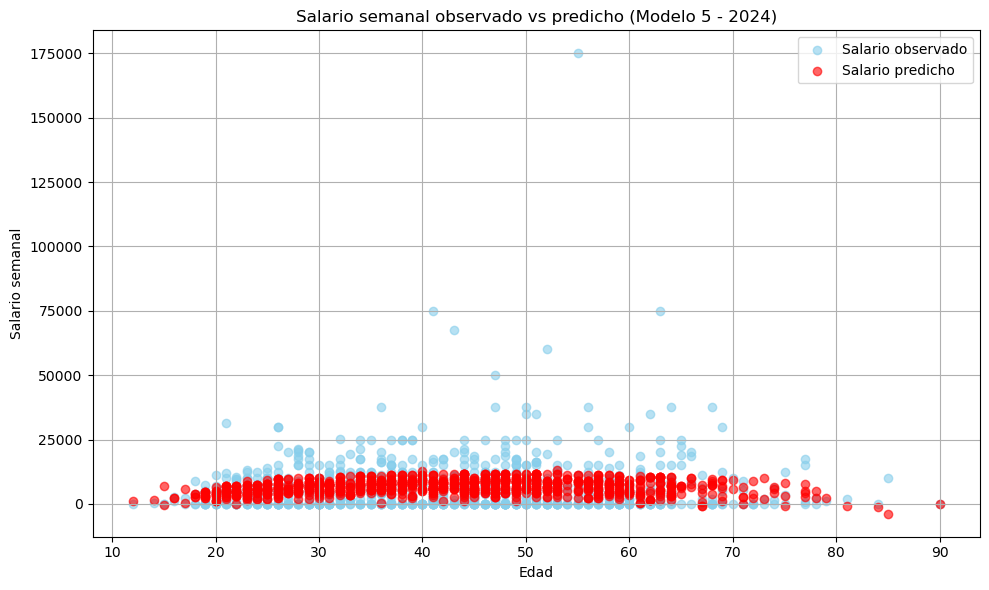

In [74]:
df = pd.read_excel("respondieron_2024.xlsx")

# Mapear variable 'estado' si es necesario
df['estado'] = df['ESTADO']  # o ajustar según el nombre real
df['estado_num'] = df['estado']
df['salario_semanal'] = df['P21'] / 40

# Filtrar ocupados
ocupados = df[df['estado_num'] == 1].copy()

# Crear variables
ocupados['edad'] = pd.to_numeric(ocupados['CH06'], errors='coerce')
ocupados['edad2'] = ocupados['edad'] ** 2
ocupados['educ'] = pd.to_numeric(ocupados['NIVEL_ED'], errors='coerce')
ocupados['NIVEL_ED'] = pd.to_numeric(ocupados['NIVEL_ED'], errors='coerce')
ocupados['mujer'] = (ocupados['CH04'] == 2).astype(int)

# Limpiar NaNs
ocupados = ocupados.dropna(subset=['salario_semanal', 'edad', 'edad2', 'educ', 'NIVEL_ED', 'mujer'])

# Variables del modelo 5
X = ocupados[['edad', 'edad2', 'educ', 'mujer', 'NIVEL_ED']]
y = ocupados['salario_semanal']

# Dividir entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=444)

# Agregar constante
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Ajustar modelo
modelo = sm.OLS(y_train, X_train).fit()

# Predecir sobre test
y_pred = modelo.predict(X_test)

# Guardar edad real del test
edades_test = X_test['edad']

# -------------------------------
# 📊 Graficar
# -------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(edades_test, y_test, color='skyblue', label='Salario observado', alpha=0.6)
plt.scatter(edades_test, y_pred, color='red', label='Salario predicho', alpha=0.6)
plt.xlabel("Edad")
plt.ylabel("Salario semanal")
plt.title("Salario semanal observado vs predicho (Modelo 5 - 2024)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()